In [45]:
#1. Импорты
import torch
import torchvision
import torchvision.datasets
import torchvision.transforms
import torch.utils.data
import torch.nn
import os
import random
from matplotlib import pyplot as plot

In [59]:
#2. Загрузка набора данных CIFAR-10
train_dataset = torchvision.datasets.CIFAR10(root = './data', train = True, download = True, transform = torchvision.transforms.ToTensor())
test_set = torchvision.datasets.CIFAR10(root = './data', train = False, download = True, transform = torchvision.transforms.ToTensor())

Files already downloaded and verified
Files already downloaded and verified


Amount of train set imgs: 50000
Amount of test set imgs: 10000


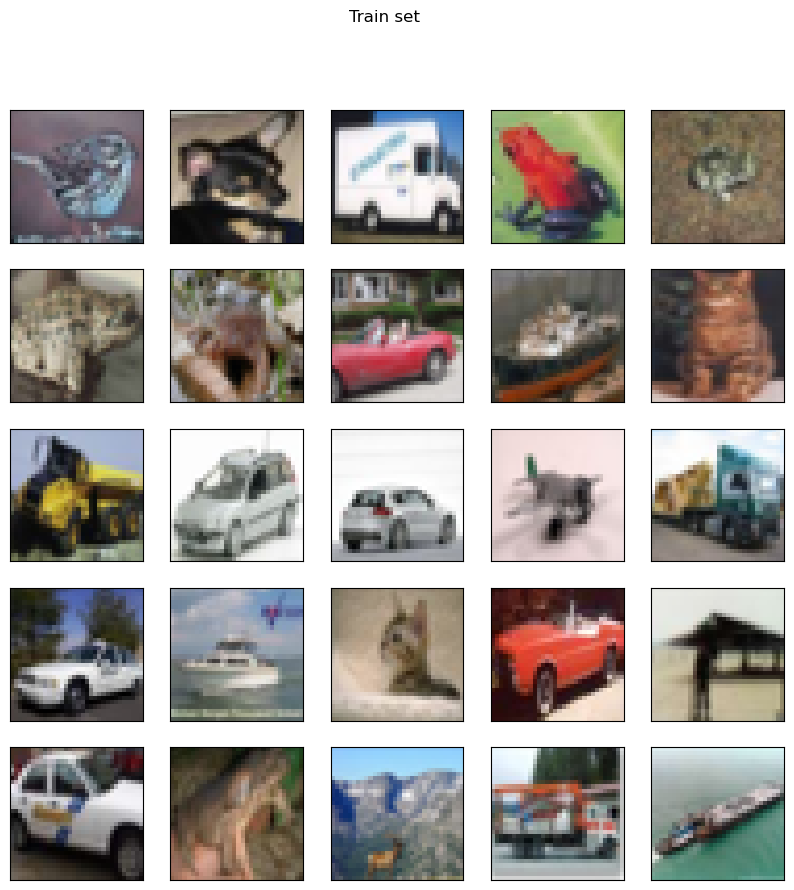

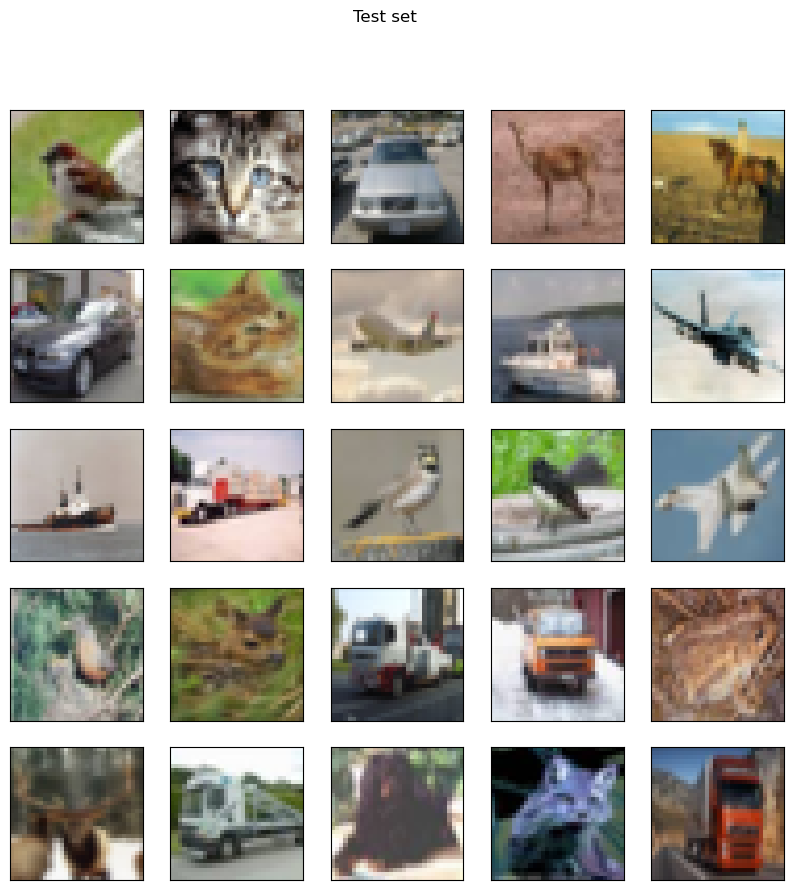

In [66]:
#3. Функция демонстрации тренировочных и тестовых изображений. Выбрано по 25 рандомных изображений
def imshow(img,title):
    amount_of_shown_imgs_x=amount_of_shown_imgs_y=5;
    img_size=(10,10)
    fig,axes = plot.subplots(amount_of_shown_imgs_y,amount_of_shown_imgs_x, figsize=img_size)
    fig.suptitle(title)
    plot.setp(plot.gcf().get_axes(), xticks = [], yticks = [])
    random_array_np = np.random.randint(0, 10000, size=25)
    for i, ax in enumerate(axes.flat):
        image = img[random_array_np[i]][0].numpy().transpose(1, 2, 0)
        ax.imshow(image)
print('Amount of train set imgs: {}'.format(len(train_dataset)))
imshow(train_dataset, 'Train set')

print('Amount of test set imgs: {}'.format(len(test_set)))
imshow(test_set, 'Test set')

In [62]:
#4. CNN
class CNN(torch.nn.Module):
    # Конструктор
    def __init__(self):
        super(CNN, self).__init__()
        # 10 x 32 x 32
        # Свертка. Размер результирующей карты признаков:
        # 10 x ((32 - 3)/3+1) x ((32 - 3)/3+1) = 10 x 10 x 10
        self.conv = torch.nn.Conv2d(in_channels = 3, out_channels = 10, kernel_size = 3, stride = 1)
        self.activation = torch.nn.ReLU()
        self.pooling = torch.nn.MaxPool2d(kernel_size = 2, stride = 1)
        # 10 x ((10-2)/1+1) x ((10-2)/1+1) = 10 x 9 x 9
        self.linear = torch.nn.Linear(10 * 9 * 9, 10)
    def forward(self,x):
        out = self.conv(x)
        out = self.activation(out)
        out = self.pooling(out)
        out = out.view(out.size(0),-1)
        out = self.linear(out)
        return out
        

In [55]:
#5. Создание объекта класса CNN
cnn = CNN()

print('Parameters of convolutions:\n1. Kernels = {}\n2. Biases = {}'.
      format(cnn.conv.weight.shape, cnn.conv.bias.shape))
print('Parameters of fully-connected layer:\n1. Weight matrix = {}\n2. Biases = {}'.
      format(cnn.linear.weight.shape, cnn.linear.bias.shape))

Parameters of convolutions:
1. Kernels = torch.Size([10, 3, 3, 3])
2. Biases = torch.Size([10])
Parameters of fully-connected layer:
1. Weight matrix = torch.Size([10, 810])
2. Biases = torch.Size([10])
